# Setup

In [1]:
%matplotlib inline

import numpy as np, pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path
import seaborn as sns 
import sklearn
from sklearn import datasets

In [2]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


# Data

Vi bruker et datasett om hus-priser kalt "California Housing Data Set". Det er bygget fra data samlet inn av U.S Census Service i 1990, og handler om huspriser i California. Det er gammelt, men mye brukt til illustrasjon av tema fra statistikk og maskinlæring. 

Beskrivelse sakset fra [artikkelen som introduserte datasettet](https://www.sciencedirect.com/science/article/pii/S016771529600140X):
> We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 characteristics.

Det kommer innebygget i scikit-learn:

In [4]:
california = datasets.fetch_california_housing()

In [5]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Vi velger som vanlig å representere data med en Pandas dataframe:

In [6]:
df = pd.DataFrame(data=california.data, columns=california.feature_names)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Vi ser at det ikke virker å være noen missing values (strengt tatt bør dette undersøkes nøyere siden missing values kan være representert med tallverdier som f.eks. -1 eller lignende, slik beskrevet i notebooken om "imputation". Men i dette tilfellet vet vi fra beskrivelsen av datasettet at det ikke er noen missing values)

Som vanlig splitter vi opp features og target (som her er MedV -- median house value, lagret i `california.target`) i X og y, og lager oss et trenings- og test-sett:

In [9]:
X,y = df.copy(), california.target

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
len(y), y[:5]

(20640, array([4.526, 3.585, 3.521, 3.413, 3.422]))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Utforsk data

Som vanlig, etter å ha lastet ned data og tatt en kikk på hvordan data er representert så er neste naturlige steg å utforske og visualisere data. Vi skal ikke gå i detalj med dette nå da vi skal fokusere på feature engineering. Men, som nevnt, dette er en av de viktigste delene av praktisk maskinlæring, og en bruker gjerne en stor andel av tiden på slike utforskinger fordi det kan gi nyttig informasjon om problemstillingen man har satt opp er kompatibel med data en har tilgjengelig, og om hvordan en skal gå frem for å lage en god prediktiv modell (og også hva "god" skal bety). 

## Se etter korrelasjoner

La oss se etter lineære korrelasjoner mellom features, og også korrelasjoner mellom features og target. For å finne korrelasjoner mellom features og target lager vi oss en dataframe `Xy` som også inneholder target:

In [14]:
Xy = X_train.copy()
Xy['MedV'] = y_train

In [15]:
Xy.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedV
2455,3.0469,32.0,5.562500,1.000000,1038.0,3.816176,36.56,-119.73,0.827
5975,2.8818,50.0,5.202614,1.076253,1241.0,2.703704,34.10,-117.77,1.672
11749,4.1685,20.0,6.700637,1.178344,745.0,2.372611,38.80,-121.15,2.175
5572,5.1727,35.0,5.463415,0.989160,1083.0,2.934959,33.86,-118.30,2.302
20179,2.9821,29.0,4.827160,1.037037,1815.0,2.800926,34.34,-119.22,1.757


In [16]:
corr = Xy.corr()

Her er alle parvise korrelasjoner:

In [17]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedV
MedInc,1.000000,-0.112955,0.357444,-0.062547,-0.002634,0.021688,-0.077459,-0.018095,0.690198
HouseAge,-0.112955,1.000000,-0.165667,-0.083451,-0.289553,0.015244,0.005459,-0.103797,0.111975
AveRooms,0.357444,-0.165667,1.000000,0.826472,-0.073841,-0.004626,0.103967,-0.024064,0.157191
AveBedrms,-0.062547,-0.083451,0.826472,1.000000,-0.064142,-0.005821,0.060961,0.022383,-0.054782
Population,-0.002634,-0.289553,-0.073841,-0.064142,1.000000,0.074966,-0.103695,0.096692,-0.033847
AveOccup,0.021688,0.015244,-0.004626,-0.005821,0.074966,1.000000,0.006021,-0.000702,-0.022052
Latitude,-0.077459,0.005459,0.103967,0.060961,-0.103695,0.006021,1.000000,-0.924899,-0.141522
Longitude,-0.018095,-0.103797,-0.024064,0.022383,0.096692,-0.000702,-0.924899,1.000000,-0.049819
MedV,0.690198,0.111975,0.157191,-0.054782,-0.033847,-0.022052,-0.141522,-0.049819,1.000000


Her er korrelasjonene med target:

In [18]:
corr['MedV'].sort_values(ascending=False)

MedV          1.000000
MedInc        0.690198
AveRooms      0.157191
HouseAge      0.111975
AveOccup     -0.022052
Population   -0.033847
Longitude    -0.049819
AveBedrms    -0.054782
Latitude     -0.141522
Name: MedV, dtype: float64

Vi ser at MedInc ("median income in block") er ganske sterkt positivt korrelert med husverdiene (MEDV). Latitude er noe negativt korrelert med MEDV. Dette kan vi også plotte:

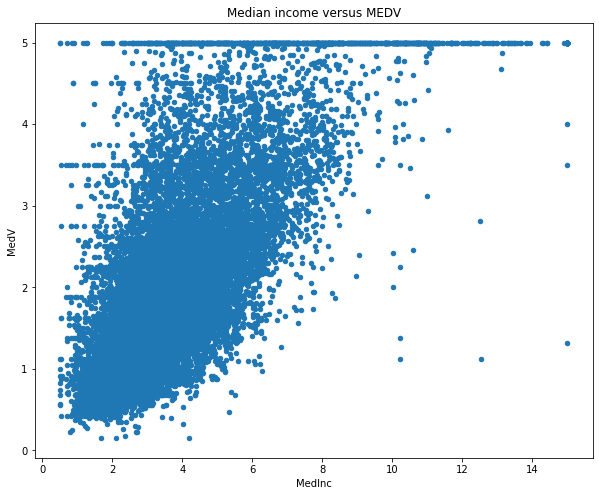

In [19]:
Xy.plot.scatter('MedInc', 'MedV', figsize=(10,8))
plt.title('Median income versus MEDV')
plt.show()

Fra plottet ser vi at generelt vil høyere median-inntekt svare til høyere median-huspris i de ulike boligkvartalene. 

> Obs: vi observerer at det ser ut til å være satt et tak på 5 (altså $50.000) på median-husverdiene. Dette er noe en burde vurdert hvordan en best kan takle, hvis dette var et mer komplett maskinlæringsprosjekt-eksempel. Vi ser bort i fra dette her. 

Vi kan også la Pandas lage plots for alle par, og også histogram av feature-verdier.

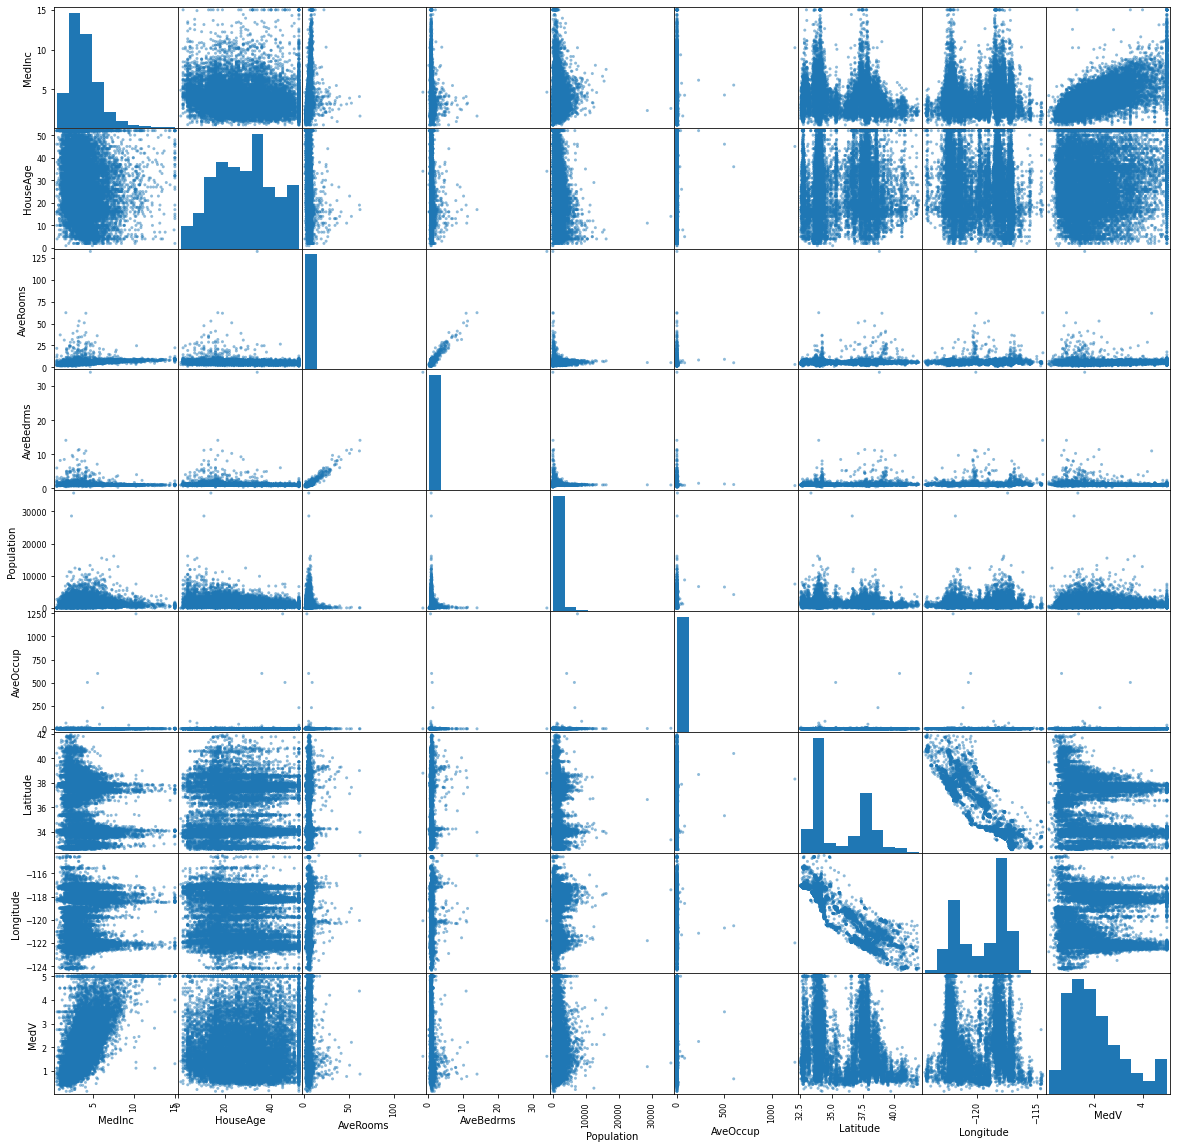

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(Xy, figsize=(20, 20))
plt.show()

# Feature engineering

La oss forsøke å designe noen nye features ved å kombinere de vi allerede har. Dette kan gjøres ved å bruke en eller annen form for domenekunnskap (dvs. en idé om hva som vil være nyttige features for å predikere huspriser) og også ved å mer blindt forsøke feature-kombinasjoner. 

Som et eksempel på førstnevnte, kanskje andelen soverom i distriktet? Altså antall soverom delt på totalt antall rom. Det er naturlig å gjette på at dette er negativt korrelert med husprisene: jo flere rom som _ikke_ er soverom, jo dyrere hus. 

In [21]:
Xy['AveBedrmsFraction'] = Xy['AveBedrms'] / Xy['AveRooms']

La oss teste hvordan dette er korrelert med husprisene:

In [22]:
corr = Xy.corr()

In [23]:
corr['MedV'].sort_values(ascending=False)

MedV                 1.000000
MedInc               0.690198
AveRooms             0.157191
HouseAge             0.111975
AveOccup            -0.022052
Population          -0.033847
Longitude           -0.049819
AveBedrms           -0.054782
Latitude            -0.141522
AveBedrmsFraction   -0.251789
Name: MedV, dtype: float64

Vi ser at gjennomsnittelig andel soverom er vesentlig mer korrelert med huspriser enn både gjennomsnittelig antall rom og gjennomsnittelig antall soverom!

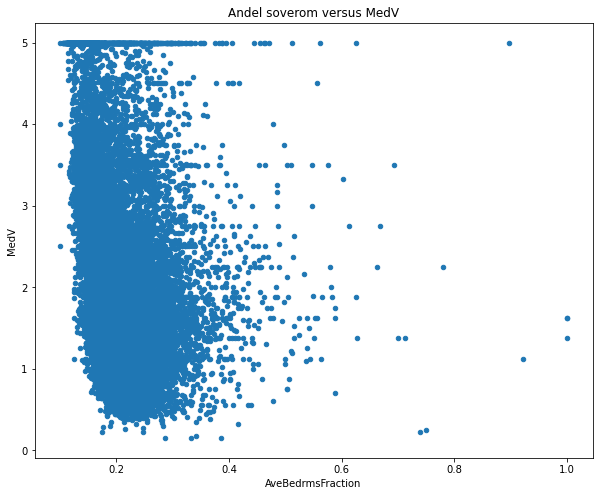

In [24]:
Xy.plot.scatter('AveBedrmsFraction', 'MedV', figsize=(10,8))
plt.title('Andel soverom versus MedV')
plt.show()

> **Yor turn!** Kan du komme opp med andre, lignende features?

## Automatisk generering av features

En annen, mer "blind" fremgangsmåte er å generere for eksempel produkter av features, eller _polynomielle_ features for alle numeriske features. Altså nye features ved å multiplisere eksisterende features med hverandre og seg selv. 

Interaksjon...

In [25]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

For noen av features kan dette tolkes fra beskrivelsene av de orginale features, f.eks. produktet AveOccup * Population = (antall hus / populasjon) * populasjon = antall hus, for andre er det mindre tolkbart.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


La oss lage alle polynom opp til andre grad. Altså $x_i, x_i^2, x_ix_j$ basert på alle features $x_i$.

> Hvor mange numeriske features får vi da?

> Vi hadde opprinnelig 8 numeriske features. Vi får da alle disse 8 + alle de 8 i andre potens + alle par $x_i x_j$ for alle ulike features. Det blir 8 + 8 + antall par av de åtte man kan velge, uten tilbakelegging = 8 + 8 + antall kombinasjoner:

In [28]:
from math import comb

In [29]:
8 + 8 + comb(8,2)

44

In [30]:
polys = PolynomialFeatures(degree=2, include_bias=False)

In [31]:
polyfeatures = polys.fit_transform(X_train)

In [32]:
X_train_poly = pd.DataFrame(data=polyfeatures)

Vi har nå 44 features:

In [33]:
X_train_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,3.0469,32.0,5.562500,1.000000,1038.0,3.816176,36.56,-119.73,9.283600,97.5008,...,1077444.0,3961.191176,37949.28,-124279.74,14.563203,139.519412,-456.910809,1336.6336,-4377.3288,14335.2729
1,2.8818,50.0,5.202614,1.076253,1241.0,2.703704,34.10,-117.77,8.304771,144.0900,...,1540081.0,3355.296296,42318.10,-146152.57,7.310014,92.196296,-318.415185,1162.8100,-4015.9570,13869.7729
2,4.1685,20.0,6.700637,1.178344,745.0,2.372611,38.80,-121.15,17.376392,83.3700,...,555025.0,1767.595541,28906.00,-90256.75,5.629285,92.057325,-287.441879,1505.4400,-4700.6200,14677.3225
3,5.1727,35.0,5.463415,0.989160,1083.0,2.934959,33.86,-118.30,26.756825,181.0445,...,1172889.0,3178.560976,36670.38,-128118.90,8.613986,99.377724,-347.205691,1146.4996,-4005.6380,13994.8900
4,2.9821,29.0,4.827160,1.037037,1815.0,2.800926,34.34,-119.22,8.892920,86.4809,...,3294225.0,5083.680556,62327.10,-216384.30,7.845186,96.183796,-333.926389,1179.2356,-4094.0148,14213.4084


In [34]:
X_train_poly['MedV'] = y_train

In [35]:
corr_poly = X_train_poly.corr()

Vi kan nå sjekke korrelasjoner med target: 

In [36]:
corr_poly['MedV'].sort_values(ascending=False)

MedV    1.000000
0       0.690198
14      0.676815
8       0.625018
9       0.594829
10      0.556920
11      0.509032
12      0.271237
17      0.222840
2       0.157191
16      0.126253
27      0.125245
1       0.111975
42      0.101505
21      0.095211
18      0.055589
33      0.052868
25      0.050507
43      0.049621
37      0.032388
13      0.024555
40      0.021481
23      0.021055
19      0.014647
26      0.002280
24     -0.002354
38     -0.005152
35     -0.008729
20     -0.009656
34     -0.014272
29     -0.014593
5      -0.022052
39     -0.022746
31     -0.027842
4      -0.033847
36     -0.041059
30     -0.045712
7      -0.049819
3      -0.054782
32     -0.072216
22     -0.114144
6      -0.141522
41     -0.145212
28     -0.159064
15     -0.691466
Name: MedV, dtype: float64